# 1. Setup

Source: https://github.com/deepchem/deepchem/tree/master/examples/tutorials

In [ ]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
# import conda_installer
# conda_installer.install()
# !/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3501  100  3501    0     0   8355      0 --:--:-- --:--:-- --:--:--  8355


python version: 3.7.12
remove current miniconda
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added omnia to channels
added conda-forge to channels


CalledProcessError: ignored

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:43
🔁 Restarting kernel...


In [ ]:
!mamba install -c conda-forge rdkit

Streaming output truncated to the last 5000 lines.
libgfortran-ng           [] (00m:00s) Waiting...
libuuid                  [] (00m:00s) Waiting...
pycairo                  [] (00m:00s) Waiting...
pytz                     [] (00m:00s) Waiting...
matplotlib-base          [] (00m:00s) Waiting...
pandas                   [] (00m:00s)     12 MB /     13 MB (  6.28 MB/s)
sqlalchemy               [] (00m:00s) Waiting...
xorg-libice              [] (00m:00s) Waiting...
xorg-libxrender          [] (00m:00s) Waiting...
zipp                     [] (00m:00s) Waiting...
kiwisolver               [] (00m:00s) Waiting...
cairo                    [] (00m:00s) Waiting...
libwebp-base             [] (00m:00s) Waiting...
libgfortran5             [] (00m:00s) Waiting...
pillow                   [] (00m:00s) 
libstdcxx-ng             [] (00m:01s) Decompressing...
libwebp                  [] (00m:01s) Waiting...
gettext                  [] (00m:01s) Waiting...
libtiff                  [] (00m:01s) Waiting.

In [ ]:
! pip install --pre deepchem

In [ ]:
import deepchem as dc
dc.__version__

'2.6.0.dev'

# 2. First Example on Training a Model with DeepChem

Typical steps:
1. Select the data set you'll train your model on (or create a new set)
2. Create the model
3. Train the model on the data
4. Evaluate the model on an independent test set 
5. Use the model to make predictions about new data

## Problem
Predicting the **solubility** of small molecules given their chemical formulas. 

**Solubility** is a very important property in drug development: if a proposed drug isn't soluble enough, you probably won't be able to get enough into the patient's bloodstream to have a therapeutic effect.

The first thing we need is a data set of measured solubilities for real molecules. One of the core components of DeepChem is MoleculeNet, a diverse collection of chemical and molecular data sets.**bold text**

In [ ]:
# Use Delaney solubility data set
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer = 'GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

ImportError: ignored

- `featurizer`: molecules can be represented in many ways, we thus tell it which representation we want to use or how to 'featurize' the data


In [ ]:
model = dc.models.GraphConvModel(n_tasks = 1, mode='regression', dropout = 0.2)

In [ ]:
model.fit(train_dataset, nb_epoch = 100)

NameError: ignored

In [ ]:
# evaluate the model, use r2
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print("Training set score:", model.evaluate(train_dataset, [metric], transformers))
print("Test set score:", model.evaluate(test_dataset, [metric], transformers))

Training set score: {'pearson_r2_score': 0.9230311733446949}
Test set score: {'pearson_r2_score': 0.6511453556986977}


Notice that it has a higher score on the training set than the test set. Models usually perform better on the particular data they were trained on than they do on similar but independent data. This is called "overfitting", and it is the reason it is essential to evaluate your model on an independent test set.

Our model still has quite respectable performance on the test set. For comparison, a model that produced totally random outputs would have a correlation of 0, while one that made perfect predictions would have a correlation of 1. Our model does quite well, so now we can use it to make predictions about other molecules we care about.

Since this is just a tutorial and we don't have any other molecules we specifically want to predict, let's just use the first ten molecules from the test set. For each one we print out the chemical structure (represented as a SMILES string) and the predicted solubility. To put these predictions in context, we print out the solubility values from the test set as well.

In [ ]:
solubilities = model.predict_on_batch(test_dataset.X[:10])
for molecule, solubility, test_solubility in zip(test_dataset.ids, solubilities, test_dataset.y):
  print(solubility, test_solubility, molecule)

[-1.716409] [-1.60114461] c1cc2ccc3cccc4ccc(c1)c2c34
[1.0071244] [0.20848251] Cc1cc(=O)[nH]c(=S)[nH]1
[-0.7737801] [-0.01602738] Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 
[-1.9947791] [-2.82191713] c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
[-1.2294178] [-0.52891635] C1=Cc2cccc3cccc1c23
[1.7083766] [1.10168349] CC1CO1
[-0.04624155] [-0.88987406] CCN2c1ccccc1N(C)C(=S)c3cccnc23 
[-0.89319324] [-0.52649706] CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O
[-1.4153583] [-0.76358725] Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F
[-0.08284032] [-0.64020358] ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 


# 3. Working with datasets

In [ ]:
print(test_dataset)

<DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['c1cc2ccc3cccc4ccc(c1)c2c34' 'Cc1cc(=O)[nH]c(=S)[nH]1'
 'Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 ' ...
 'c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43' 'Cc1occc1C(=O)Nc2ccccc2'
 'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '], task_names: ['measured log solubility in mols per litre']>


There's a lot of information there, so let's start at the beginning. It begins with the label "DiskDataset". Dataset is an abstract class. It has a few subclasses that correspond to different ways of storing data.
- DiskDataset is a dataset that has been saved to disk. The data is stored in a way that can be efficiently accessed, even if the total amount of data is far larger than your computer's memory.
- NumpyDataset is an in-memory dataset that holds all the data in NumPy arrays. It is a useful tool when manipulating small to medium sized datasets that can fit entirely in memory.
- ImageDataset is a more specialized class that stores some or all of the data in image files on disk. It is useful when working with models that have images as their inputs or outputs.

Now let's consider the contents of the Dataset. Every Dataset stores a list of samples. Very roughly speaking, a sample is a single data point. In this case, each sample is a molecule. In other datasets a sample might correspond to an experimental assay, a cell line, an image, or many other things. For every sample the dataset stores the following information.

- The features, referred to as X. This is the input that should be fed into a model to represent the sample.
- The labels, referred to as y. This is the desired output from the model. During training, it tries to make the model's output for each sample as close as possible to y.
- The weights, referred to as w. This can be used to indicate that some data values are more important than others. In later tutorials we will see examples of how this is useful.
- An ID, which is a unique identifier for the sample. This can be anything as long as it is unique. Sometimes it is just an integer index, but in this dataset the ID is a SMILES string describing the molecule.
Notice that X, y, and w all have 113 as the size of their first dimension. That means this dataset contains 113 samples.

The final piece of information listed in the output is task_names. Some datasets contain multiple pieces of information for each sample. For example, if a sample represents a molecule, the dataset might record the results of several different experiments on that molecule. This dataset has only a single task: "measured log solubility in mols per litre". Also notice that y and w each have shape (113, 1). The second dimension of these arrays usually matches the number of tasks.

In [ ]:
# accessing data from a dataset
test_dataset.y

array([[-1.60114461],
       [ 0.20848251],
       [-0.01602738],
       [-2.82191713],
       [-0.52891635],
       [ 1.10168349],
       [-0.88987406],
       [-0.52649706],
       [-0.76358725],
       [-0.64020358],
       [-0.38569452],
       [-0.62568785],
       [-0.39585553],
       [-2.05306753],
       [-0.29666474],
       [-0.73213651],
       [-1.27744393],
       [ 0.0081655 ],
       [ 0.97588054],
       [-0.10796031],
       [ 0.59847167],
       [-0.60149498],
       [-0.34988907],
       [ 0.34686576],
       [ 0.62750312],
       [ 0.14848418],
       [ 0.02268122],
       [-0.85310089],
       [-2.72079091],
       [ 0.42476682],
       [ 0.01300407],
       [-2.4851523 ],
       [-2.15516147],
       [ 1.00975056],
       [ 0.82588471],
       [-0.90390593],
       [-0.91067993],
       [-0.82455329],
       [ 1.26909819],
       [-1.14825397],
       [-2.1343556 ],
       [-1.15744727],
       [-0.1045733 ],
       [ 0.53073162],
       [-1.22567118],
       [-1

becareful with large datasets for loading them using this method may take up a lot of memory. A better approach is to iterate over the dataset

In [ ]:
for x, y, w, id in test_dataset.itersamples():
  print(y, id)

[-1.60114461] c1cc2ccc3cccc4ccc(c1)c2c34
[0.20848251] Cc1cc(=O)[nH]c(=S)[nH]1
[-0.01602738] Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4 
[-2.82191713] c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
[-0.52891635] C1=Cc2cccc3cccc1c23
[1.10168349] CC1CO1
[-0.88987406] CCN2c1ccccc1N(C)C(=S)c3cccnc23 
[-0.52649706] CC12CCC3C(CCc4cc(O)ccc34)C2CCC1=O
[-0.76358725] Cn2cc(c1ccccc1)c(=O)c(c2)c3cccc(c3)C(F)(F)F
[-0.64020358] ClC(Cl)(Cl)C(NC=O)N1C=CN(C=C1)C(NC=O)C(Cl)(Cl)Cl 
[-0.38569452] COc2c1occc1cc3ccc(=O)oc23 
[-0.62568785] CN2C(=C(O)c1ccccc1S2(=O)=O)C(=O)Nc3ccccn3 
[-0.39585553] Cc3cc2nc1c(=O)[nH]c(=O)nc1n(CC(O)C(O)C(O)CO)c2cc3C
[-2.05306753] c1ccc(cc1)c2ccc(cc2)c3ccccc3
[-0.29666474] CC34CC(=O)C1C(CCC2=CC(=O)CCC12C)C3CCC4(=O) 
[-0.73213651] c1ccc2c(c1)sc3ccccc23
[-1.27744393] CC23Cc1cnoc1C=C2CCC4C3CCC5(C)C4CCC5(O)C#C
[0.0081655] OC(C(=O)c1ccccc1)c2ccccc2
[0.97588054] OCC2OC(Oc1ccccc1CO)C(O)C(O)C2O
[-0.10796031] CC3C2CCC1(C)C=CC(=O)C(=C1C2OC3=O)C
[0.59847167] O=Cc2ccc1OCOc1c2 
[-0.60149498] CC1CCCCC1NC(=O)N

Most deep learning models can process a batch of multiple samples all at once

In [ ]:
for X, y, w, ids in test_dataset.iterbatches(batch_size=50):
  print(y.shape)

(50, 1)
(50, 1)
(13, 1)


`iterbatches()` has other features that are useful when training models. For example, `iterbatches(batch_size=100, epochs=10, deterministic=False)` will iterate over the complete dataset ten times, each time with the samples in a different random order.

Datasets can also expose data using the standard interfaces for TensorFlow and PyTorch. To get a `tensorflow.data.Dataset`, call `make_tf_dataset()`. To get a `torch.utils.data.IterableDataset`, call `make_pytorch_dataset()`. See the API documentation for more details.

In [ ]:
test_dataset.to_dataframe()

,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.601145,1.0,c1cc2ccc3cccc4ccc(c1)c2c34
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.208483,1.0,Cc1cc(=O)[nH]c(=S)[nH]1
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.016027,1.0,Oc1ccc(cc1)C2(OC(=O)c3ccccc23)c4ccc(O)cc4
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.821917,1.0,c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.528916,1.0,C1=Cc2cccc3cccc1c23
...,...,...,...,...
108,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-1.656304,1.0,ClC4=C(Cl)C5(Cl)C3C1CC(C2OC12)C3C4(Cl)C5(Cl)Cl
109,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.743629,1.0,c1ccsc1
110,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-2.420799,1.0,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
111,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.209570,1.0,Cc1occc1C(=O)Nc2ccccc2


### Creating Datasets

In [ ]:
import numpy as np
X = np.random.random((10, 5))
y = np.random.random((10, 2))

dataset = dc.data.NumpyDataset(X=X, y=y)
print(dataset)

<NumpyDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


In [ ]:
dataset.to_dataframe()

,X1,X2,X3,X4,X5,y1,y2,w,ids
0,0.651831,0.202033,0.405201,0.277424,0.636146,0.898741,0.918677,1.0,0
1,0.907047,0.562974,0.747688,0.370007,0.923998,0.508708,0.332369,1.0,1
2,0.121539,0.072508,0.844096,0.823712,0.566737,0.935280,0.619635,1.0,2
3,0.556163,0.665025,0.097462,0.825239,0.664068,0.468226,0.590172,1.0,3
4,0.432056,0.134369,0.898917,0.040486,0.201453,0.623414,0.157862,1.0,4
5,0.589882,0.284805,0.819830,0.341877,0.887811,0.056486,0.882579,1.0,5
6,0.071850,0.601506,0.885665,0.353164,0.437763,0.925422,0.219701,1.0,6
7,0.870188,0.784728,0.839984,0.734750,0.485825,0.253371,0.592145,1.0,7
8,0.244494,0.320196,0.686118,0.116691,0.431514,0.628306,0.297300,1.0,8
9,0.458435,0.609667,0.329233,0.114392,0.308120,0.351508,0.590168,1.0,9


In [ ]:
# use DiskDataset
import tempfile

with tempfile.TemporaryDirectory() as data_dir:
  disk_dataset = dc.data.DiskDataset.from_numpy(X=X, y=y, data_dir=data_dir)
  print(disk_dataset)

<DiskDataset X.shape: (10, 5), y.shape: (10, 2), w.shape: (10, 1), ids: [0 1 2 3 4 5 6 7 8 9], task_names: [0 1]>


# 3. An Introduction to MoleculeNet

In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv', splitter='random')

In [ ]:
# let's take a look at molnet in more details
[method for method in dir(dc.molnet) if 'load_' in method]

['load_Platinum_Adsorption',
 'load_bace_classification',
 'load_bace_regression',
 'load_bandgap',
 'load_bbbc001',
 'load_bbbc002',
 'load_bbbp',
 'load_cell_counting',
 'load_chembl',
 'load_chembl25',
 'load_clearance',
 'load_clintox',
 'load_delaney',
 'load_factors',
 'load_freesolv',
 'load_function',
 'load_hiv',
 'load_hopv',
 'load_hppb',
 'load_kaggle',
 'load_kinase',
 'load_lipo',
 'load_mp_formation_energy',
 'load_mp_metallicity',
 'load_muv',
 'load_nci',
 'load_pcba',
 'load_pdbbind',
 'load_perovskite',
 'load_ppb',
 'load_qm7',
 'load_qm8',
 'load_qm9',
 'load_sampl',
 'load_sider',
 'load_sweet',
 'load_thermosol',
 'load_tox21',
 'load_toxcast',
 'load_uspto',
 'load_uv',
 'load_zinc15']

In [ ]:
# check number of datasets available
len([method for method in dir(dc.molnet) if 'load_' in method])

42

Check details of datasets [here](https://deepchem.readthedocs.io/en/latest/api_reference/moleculenet.html)

### MoleculeNet Loaders explained
All MoleculeNet loader functions take the form dc.molnet.load_X. Loader functions return a tuple of arguments (tasks, datasets, transformers). Let's walk through each of these return values and explain what we get:

1. tasks: This is a list of task-names. Many datasets in MoleculeNet are "multitask". That is, a given datapoint has multiple labels associated with it. These correspond to different measurements or values associated with this datapoint.

2. datasets: This field is a tuple of three dc.data.Dataset objects (train, valid, test). These correspond to the training, validation, and test set for this MoleculeNet dataset.

3. transformers: This field is a list of dc.trans.Transformer objects which were applied to this dataset during processing.

In [ ]:
tasks

['measured log solubility in mols per litre']

In [ ]:
datasets

(<DiskDataset X.shape: (902,), y.shape: (902, 1), w.shape: (902, 1), ids: ['CCCCOCN(C(=O)CCl)c1c(CC)cccc1CC ' 'CC(C)CCC(C)(C)C'
  'Cn2c(=O)on(c1ccc(Cl)c(Cl)c1)c2=O' ... 'O=N(=O)c1cccc2ccccc12' 'CC(Cl)Cl'
  'BrCCBr'], task_names: ['measured log solubility in mols per litre']>,
 <DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['c2ccc1[nH]ccc1c2' 'Cc1ccc(O)cc1' 'CCC(O)(CC)CC' ...
  'O=C2NC(=O)C1(CCC1)C(=O)N2'
  'OCC1OC(CO)(OC2OC(COC3OC(CO)C(O)C(O)C3O)C(O)C(O)C2O)C(O)C1O'
  'Oc1ccc(cc1)N(=O)=O'], task_names: ['measured log solubility in mols per litre']>,
 <DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['CCC(C)O' 'C1CCc2ccccc2C1' 'c2(Cl)c(Cl)c(Cl)c1nccnc1c2(Cl) ' ...
  'CCN(CC)C(=S)SSC(=S)N(CC)CC' 'CCOC(=O)c1ccccc1C(=O)OCC' 'Oc1ccncc1'], task_names: ['measured log solubility in mols per litre']>)

In [ ]:
train, valid, test = datasets

In [ ]:
train

<DiskDataset X.shape: (902,), y.shape: (902, 1), w.shape: (902, 1), ids: ['CCCCOCN(C(=O)CCl)c1c(CC)cccc1CC ' 'CC(C)CCC(C)(C)C'
 'Cn2c(=O)on(c1ccc(Cl)c(Cl)c1)c2=O' ... 'O=N(=O)c1cccc2ccccc12' 'CC(Cl)Cl'
 'BrCCBr'], task_names: ['measured log solubility in mols per litre']>

In [ ]:
valid

<DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['c2ccc1[nH]ccc1c2' 'Cc1ccc(O)cc1' 'CCC(O)(CC)CC' ...
 'O=C2NC(=O)C1(CCC1)C(=O)N2'
 'OCC1OC(CO)(OC2OC(COC3OC(CO)C(O)C(O)C3O)C(O)C(O)C2O)C(O)C1O'
 'Oc1ccc(cc1)N(=O)=O'], task_names: ['measured log solubility in mols per litre']>

In [ ]:
test

<DiskDataset X.shape: (113,), y.shape: (113, 1), w.shape: (113, 1), ids: ['CCC(C)O' 'C1CCc2ccccc2C1' 'c2(Cl)c(Cl)c(Cl)c1nccnc1c2(Cl) ' ...
 'CCN(CC)C(=S)SSC(=S)N(CC)CC' 'CCOC(=O)c1ccccc1C(=O)OCC' 'Oc1ccncc1'], task_names: ['measured log solubility in mols per litre']>

In [ ]:
train.X[0]

In [ ]:
transformers

So we see that one transformer was applied, the `dc.trans.NormalizationTransformer`.
 
After reading through this description so far, you may be wondering what choices are made under the hood. As we've briefly mentioned previously, datasets can be processed with different choices of "featurizers". Can we control the choice of featurization here? In addition, how was the source dataset split into train/valid/test as three different datasets?

You can use the 'featurizer' and 'splitter' keyword arguments and pass in different strings. Common possible choices for 'featurizer' are 'ECFP', 'GraphConv', 'Weave' and 'smiles2img' corresponding to the `dc.feat.CircularFingerprint`, `dc.feat.ConvMolFeaturizer`, `dc.feat.WeaveFeaturizer` and `dc.feat.SmilesToImage` featurizers. Common possible choices for 'splitter' are None, 'index', 'random', 'scaffold' and 'stratified' corresponding to no split, `dc.splits.IndexSplitte`r, `dc.splits.RandomSplitter`, `dc.splits.SingletaskStratifiedSplitter`. We haven't talked much about splitters yet, but intuitively they're a way to partition a dataset based on different criteria. We'll say more in a future tutorial.

Instead of a string, you also can pass in any Featurizer or Splitter object. This is very useful when, for example, a Featurizer has constructor arguments you can use to customize its behavior.

In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP', splitter = 'scaffold')

In [ ]:
(train, valid, test) = datasets

In [ ]:
train

<DiskDataset X.shape: (902, 1024), y.shape: (902, 1), w.shape: (902, 1), ids: ['CC(C)=CCCC(C)=CC(=O)' 'CCCC=C' 'CCCCCCCCCCCCCC' ...
 'Nc2cccc3nc1ccccc1cc23 ' 'C1CCCCCC1' 'OC1CCCCCC1'], task_names: ['measured log solubility in mols per litre']>

In [ ]:
train.X[0]

array([0., 0., 0., ..., 0., 0., 0.])

# 4. Molecular Fingerprint
Deep learning models almost always take arrays of numbers as their inputs. If we want to process molecules with them, we somehow need to represent each molecule as one or more arrays of numbers.

Many (but not all) types of models require their inputs to have a fixed size. This can be a challenge for molecules, since different molecules have different numbers of atoms. If we want to use these types of models, we somehow need to represent variable sized molecules with fixed sized arrays.

Fingerprints are designed to address these problems. A fingerprint is a fixed length array, where different elements indicate the presence of different features in the molecule. If two molecules have similar fingerprints, that indicates they contain many of the same features, and therefore will likely have similar chemistry.

DeepChem supports a particular type of fingerprint called an "Extended Connectivity Fingerprint", or "ECFP" for short. They also are sometimes called "circular fingerprints". The ECFP algorithm begins by classifying atoms based only on their direct properties and bonds. Each unique pattern is a feature. For example, "carbon atom bonded to two hydrogens and two heavy atoms" would be a feature, and a particular element of the fingerprint is set to 1 for any molecule that contains that feature. It then iteratively identifies new features by looking at larger circular neighborhoods. One specific feature bonded to two other specific features becomes a higher level feature, and the corresponding element is set for any molecule that contains it. This continues for a fixed number of iterations, most often two.

In [ ]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets
print(train_dataset)

<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>


Tox21 contains information about the toxicity of molecules. 12 different assays were used to look for signs of toxicty. The dataset records the results of all 12 assays, each as a different task

In [ ]:
train_dataset.w

array([[1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 0.        ,
        1.05288369],
       ...,
       [1.04502242, 0.        , 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 0.        , 1.17464996,
        1.05288369]])

### Training a Model on Fingerprints

`MultitaskClassifier`: a simple fully connected layers
- hidden layer of width 1000
- each input will have 1024 features
- prediction for 12 different tasks

Why not train a separate model for each task? We could do that, but it turns out that training a single model for multiple tasks often works better

In [ ]:
model = dc.models.MultitaskClassifier(n_tasks=12, n_features=1024, layer_sizes=[1000])

In [ ]:
model.fit(train_dataset, nb_epoch=10)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train_dataset, [metric], transformers))
print('Test set score:', model.evaluate(test_dataset, [metric], transformers))

Training set score: {'roc_auc_score': 0.9586838470453185}
Test set score: {'roc_auc_score': 0.6854069035941471}


# 6. Creating models with TensorFlow and PyTorch

- 50% dropout to provide regularization

How does our model do at predicting the solubilities of molecules based on their extended-connectivity fingerprints(ECFPs)?

In [ ]:
import tensorflow as tf

keras_model = tf.keras.Sequential([
                                   tf.keras.layers.Dense(1000, activation='relu'),
                                   tf.keras.layers.Dropout(rate=0.5),
                                   tf.keras.layers.Dense(1)
])
model = dc.models.KerasModel(keras_model, dc.models.losses.L2Loss())

In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP', splitter='random')
train_dataset, valid_dataset, test_dataset = datasets
model.fit(train_dataset, nb_epoch=50)
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print('training set score:', model.evaluate(train_dataset, [metric]))
print('test set score:', model.evaluate(test_dataset, [metric]))

training set score: {'pearson_r2_score': 0.9783318852375199}
test set score: {'pearson_r2_score': 0.7208147508349786}


In [ ]:
import torch

pytorch_model = torch.nn.Sequential(
    torch.nn.Linear(1024, 1000),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(1000, 1)
)

model = dc.models.TorchModel(pytorch_model, dc.models.losses.L2Loss())

model.fit(train_dataset, nb_epoch=50)
print('Training set score:', model.evaluate(train_dataset, [metric]))
print('Test set score:', model.evaluate(test_dataset, [metric]))

Training set score: {'pearson_r2_score': 0.9789990633457347}
Test set score: {'pearson_r2_score': 0.7153025243448052}


### Computing losses
In the above models, the loss was computed directly from the model's output. Often that is fine, but not always. Consider a classification model that outputs a probability distribution. While it is possible to compute the loss from the probabilities, it is more numerically stable to compute it from the logits.

To do this, we create a model that returns multiple outputs, both probabilities and logits.  KerasModel and TorchModel let you specify a list of "output types". If a particular output has type 'prediction', that means it is a normal output that should be returned when you call predict(). If it has type 'loss', that means it should be passed to the loss function in place of the normal outputs.

Sequential models do not allow multiple outputs, so instead we use a subclassing style model.

In [ ]:
class ClassificationModel(tf.keras.Model):
  def __init__(self):
    super(ClassificationModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(1000, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1)

  def call(self, inputs, training=False):
    y = self.dense1(inputs)
    if training:
      y = tf.nn.dropout(y, 0.5)
    logits = self.dense2(y)
    output = tf.nn.sigmoid(logits)

    return output, logits

keras_model = ClassificationModel()
output_types = ['prediction', 'loss']
model = dc.models.KerasModel(keras_model, dc.models.losses.SigmoidCrossEntropy(), output_types = output_types)

Let's train on the BACE dataset, which is a binary classification task that tries to predict whether a molecule will inhibit the enzyme BACE-1

In [ ]:
tasks, datasets, transformers = dc.molnet.load_bace_classification(featurizer='ECFP', split='scaffold')
train_dataset, valid_dataset, test_dataset = datasets
model.fit(train_dataset, nb_epoch=100)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train_dataset, [metric]))
print('Test set score:', model.evaluate(test_dataset, [metric]))

'split' is deprecated.  Use 'splitter' instead.


Training set score: {'roc_auc_score': 0.9996340015366347}
Test set score: {'roc_auc_score': 0.7697463768115942}


## 7. Introduction to Graph Convolutions

- Molecules can be naturally viewed as graphs
<img src = 'https://camo.githubusercontent.com/f7718d9845ec3fb43c1418253d1fc820edbad38a/68747470733a2f2f6769746875622e636f6d2f646565706368656d2f646565706368656d2f626c6f622f6d61737465722f6578616d706c65732f7475746f7269616c732f6173736574732f62617369635f6772617068732e6769663f7261773d31'>

### What are graph convolutions?

Consider a standard CNN. The input is a grid of pixels. There is a vector of data values for each pixel, for e.g. RGB channels. The data passes through a series of convolutional layers. Each layer combines the data from a pixel and its neighbors to produce a new data vector for the pixel. Early layers detect small scale local patterns, while later layers detect larger, more abstract patterns. Often the convolutional layers alternate w/ pooling layers that perform some operation such as max or min over local regions.

Graph convolutions are similar, but they operate on a graph. They begin with a data vector for each node of the graph (for e.g. the chemical properties of the atom that node represents). Convolutional and pooling layers combine information from connected nodes(for e.g. atoms that are bonded to each other) to produce a new data vector for each node

### Training a GraphConvModel

In [ ]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
n_tasks = len(tasks)
model = dc.models.GraphConvModel(n_tasks, mode='classification')
model.fit(train_dataset, nb_epoch=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_14:0", shape=(438,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_13:0", shape=(438, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_17:0", shape=(1362,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_32:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_31:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_10:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_35:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool

0.27805562973022463

In [ ]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
print('Training set score:', model.evaluate(train_dataset, [metric], transformers))
print('Test set score:', model.evaluate(test_dataset, [metric], transformers))

Training set score: {'roc_auc_score': 0.9709189487402662}
Test set score: {'roc_auc_score': 0.7088160141336702}


The results are pretty good, and GraphConvModel is very easy to use. But what's going on under the hood? Could we build GraphConvModel ourselves? Of course! DeepChem provides Keras layers for all the calculations involved in a graph convolution. We are going to apply the following layers from DeepChem.
- GraphConv layer: This layer implements the graph convolution. The graph convolution combines per-node feature vectures in a nonlinear fashion with the feature vectors for neighboring nodes. This "blends" information in local neighborhoods of a graph.
- GraphPool layer: This layer does a max-pooling over the feature vectors of atoms in a neighborhood. You can think of this layer as analogous to a max-pooling layer for 2D convolutions but which operates on graphs instead.
- GraphGather: Many graph convolutional networks manipulate feature vectors per graph-node. For a molecule for example, each node might represent an atom, and the network would manipulate atomic feature vectors that summarize the local chemistry of the atom. However, at the end of the application, we will likely want to work with a molecule level feature representation. This layer creates a graph level feature vector by combining all the node-level feature vectors.

Apart from this we are going to apply standard neural network layers such as Dense, BatchNormalization and Softmax layer.

In [ ]:
from deepchem.models.layers import GraphConv, GraphPool, GraphGather
import tensorflow.keras.layers as layers

batch_size = 100

class GraphConvModel(tf.keras.Model):

  def __init__(self):
    super(GraphConvModel, self).__init__()
    self.gc1 = GraphConv(128, activation_fn=tf.nn.tanh)
    self.batch_norm1 = layers.BatchNormalization()
    self.gp1 = GraphPool()

    self.gc2 = GraphConv(128, activation_fn=tf.nn.tanh)
    self.batch_norm2 = layers.BatchNormalization()
    self.gp2 = GraphPool()

    self.dense1 = layers.Dense(256, activation=tf.nn.tanh)
    self.batch_norm3 = layers.BatchNormalization()
    self.readout = GraphGather(batch_size=batch_size, activation_fn=tf.nn.tanh)

    self.dense2 = layers.Dense(n_tasks*2)
    self.logits = layers.Reshape((n_tasks, 2))
    self.softmax = layers.Softmax()

  def call(self, inputs):
    gc1_output = self.gc1(inputs)
    batch_norm1_output = self.batch_norm1(gc1_output)
    gp1_output = self.gp1([batch_norm1_output] + inputs[1:])

    gc2_output = self.gc2([gp1_output] + inputs[1:])
    batch_norm2_output = self.batch_norm1(gc2_output)
    gp2_output = self.gp2([batch_norm2_output] + inputs[1:])

    dense1_output = self.dense1(gp2_output)
    batch_norm3_output = self.batch_norm3(dense1_output)
    readout_output = self.readout([batch_norm3_output] + inputs[1:])

    logits_output = self.logits(self.dense2(readout_output))
    return self.softmax(logits_output)

We can now see more clearly what is happening. There are two convolutional blocks, each consisting of a GraphConv, followed by batch normalization, followed by a GraphPool to do max pooling. We finish up with a dense layer, another batch normalization, a GraphGather to combine the data from all the different nodes, and a final dense layer to produce the global output.

What are the inputs of the model? A graph convolution requires a complete description of each molecule, including the list of nodes (atoms) and a description of which ones are bonded to each other. In fact, we inspect the dataset we see that the feature array contains Python objects of type `ConvMol`

In [ ]:
model = dc.models.KerasModel(GraphConvModel(), loss = dc.models.losses.CategoricalCrossEntropy())

In [ ]:
test_dataset.X[0]

Models expect arrays of numbers as their inputs, not Python objects. We must convert the ConvMol objects into the particular set of arrays expected by the GraphConv, GraphPool, and GraphGather layers. Fortunately, the ConvMol class includes the code to do this, as well as to combine all the molecules in a batch to create a single set of arrays.

The following code creates a Python generator that given a batch of data generates the lists of inputs, labels, and weights whose values are Numpy arrays. atom_features holds a feature vector of length 75 for each atom. The other inputs are required to support minibatching in TensorFlow. degree_slice is an indexing convenience that makes it easy to locate atoms from all molecules with a given degree. membership determines the membership of atoms in molecules (atom i belongs to molecule membership[i]). deg_adjs is a list that contains adjacency lists grouped by atom degree. For more details, check out the [code](https://github.com/deepchem/deepchem/blob/master/deepchem/feat/mol_graphs.py).

In [ ]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

def data_generator(dataset, epochs=1):
  for ind, (X_b, y_b, w_b, ids_b) in enumerate(dataset.iterbatches(batch_size, epochs,
                                                                   deterministic=False, pad_batches=True)):
    multiConvMol = ConvMol.agglomerate_mols(X_b)
    inputs = [multiConvMol.get_atom_features(), multiConvMol.deg_slice, np.array(multiConvMol.membership)]
    for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
      inputs.append(multiConvMol.get_deg_adjacency_lists()[i])
    labels = [to_one_hot(y_b.flatten(), 2).reshape(-1, n_tasks, 2)]
    weights = [w_b]
    yield (inputs, labels, weights)

In [ ]:
model.fit_generator(data_generator(train_dataset, epochs=50))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/graph_conv_model_4/graph_pool_12/Reshape_14:0", shape=(468,), dtype=int32), values=Tensor("gradient_tape/graph_conv_model_4/graph_pool_12/Reshape_13:0", shape=(468, 128), dtype=float32), dense_shape=Tensor("gradient_tape/graph_conv_model_4/graph_pool_12/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/graph_conv_model_4/graph_pool_12/Reshape_17:0", shape=(1510,), dtype=int32), values=Tensor("gradient_tape/graph_conv_model_4/graph_pool_12/Reshape_16:0", shape=(1510, 128), dtype=float32), dense_shape=Tensor(

0.20464336395263671

In [ ]:
print('Training set score:', model.evaluate_generator(data_generator(train_dataset), [metric], transformers))
print('Test set score:', model.evaluate_generator(data_generator(test_dataset), [metric], transformers))

Training set score: {'roc_auc_score': 0.8100663506127955}
Test set score: {'roc_auc_score': 0.6480119726585779}


# 8. Molecular Featurizations
- Involes turning a molecule into a vector or tensor of some sort

### Featurizers
There are 3 different ways of using featurizers
1. When using the MoleculeNet loader functions, you simply pass the name of the featurization method to use. For e.g. `featurizer = 'ECFP'` or `featurizer = 'GraphConv'`
2. You can also create a Featurizer and directly apply it to molecules

In [ ]:
featurizer = dc.feat.CircularFingerprint()
print(featurizer(['CC', 'CCC', 'CCO']))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### RDKitDescriptors

- Featurizes a molecule by usng RDKit to compute values for a list of descriptors. These are basic physical and chemical properties: molecular weight, polar surface area, numbers of hydrogen donors and acceptors, etc. This is most useful for predicting things that depend on these high level properties rather than on detailed molecular structure.

In [ ]:
rdkit_featurizer = dc.feat.RDKitDescriptors()
features = rdkit_featurizer(['CCC'])[0]
for feature, descriptor in zip(features[:10], rdkit_featurizer.descriptors):
  print(descriptor, feature)

MaxEStateIndex 2.125
MinEStateIndex 1.25
MaxAbsEStateIndex 2.125
MinAbsEStateIndex 1.25
qed 0.3854706587740357
MolWt 44.097
HeavyAtomMolWt 36.033
ExactMolWt 44.062600255999996
NumValenceElectrons 20.0
NumRadicalElectrons 0.0


In [ ]:
print('The number of descriptors present is: ', len(features))


The number of descriptors present is:  208


### WeaveFeaturizer and MolGraphConvFeaturizer
We previously looked at graph convolutions, which use ConvMolFeaturizer to convert molecules into ConvMol objects. Graph convolutions are a special case of a large class of architectures that represent molecules as graphs. They work in similar ways but vary in the details. For example, they may associate data vectors with the atoms, the bonds connecting them, or both. They may use a variety of techniques to calculate new data vectors from those in the previous layer, and a variety of techniques to compute molecule level properties at the end.

DeepChem supports lots of different graph based models. Some of them require molecules to be featurized in slightly different ways. Because of this, there are two other featurizers called WeaveFeaturizer and MolGraphConvFeaturizer. They each convert molecules into a different type of Python object that is used by particular models. When using any graph based model, just check the documentation to see what featurizer you need to use with it.

### CoulombMatrix
When working w/ flexible molecules, you may also want to consider the different conformations the molecule can take on. For example, when a drug molecule binds to a protein, the strength of the binding depends on specific interactions between pairs of atoms. To predict binding strength, you probably want to consider a variety of possible conformations and use a model that takes them into account when making predictions.

The Coulomb matrix is one popular featurization for molecular conformations. Recall that the electrostatic Coulomb interaction between two charges is proportional to $q_1 q_2/r$ where $q_1$ and $q_2$ are the charges and $r$ is the distance between them. For a molecule with $N$ atoms, the Coulomb matrix is a $N \times N$ matrix where each element gives the strength of the electrostatic interaction between two atoms. It contains information both about the charges on the atoms and the distances between them. More information on the functional forms used can be found [here](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.108.058301).

To apply this featurizer, we first need a set of conformations for the molecule. We can use the ConformerGenerator class to do this. It takes a RDKit molecule, generates a set of energy minimized conformers, and prunes the set to only include ones that are significantly different from each other. Let's try running it for propane.

In [ ]:
from rdkit import Chem

generator = dc.utils.ConformerGenerator(max_conformers=5)
propane_mol = generator.generate_conformers(Chem.MolFromSmiles('CCC'))
print('Number of available conformers for propane: ', len(propane_mol.GetConformers()))

Number of available conformers for propane:  1


It only found a single conformer. This is hardly surprising as propane is a very small molecule with hardly any flexibility.

In [ ]:
butane_mol = generator.generate_conformers(Chem.MolFromSmiles('CCCC'))
print('Number of available conformers for butane: ', len(butane_mol.GetConformers()))

Number of available conformers for butane:  3


In [ ]:
coulomb_mat = dc.feat.CoulombMatrix(max_atoms=20)
features = coulomb_mat(propane_mol)
print(features)

[[[36.8581052  12.48684429  7.5619687   2.85945193  2.85804514
    2.85804556  1.4674015   1.46740144  0.91279491  1.14239698
    1.14239675  0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [12.48684429 36.8581052  12.48684388  1.46551218  1.45850736
    1.45850732  2.85689525  2.85689538  1.4655122   1.4585072
    1.4585072   0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [ 7.5619687  12.48684388 36.8581052   0.9127949   1.14239695
    1.14239692  1.46740146  1.46740145  2.85945178  2.85804504
    2.85804493  0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [ 2.85945193  1.46551218  0.9127949   0.5         0.29325367
    0.29325369  0.21256978  0.21256978  0.12268391  0.13960187
    0.13960185  0.          0.          0.          0.
    0.          0.          0.          0.          0.        ]
  [ 2.85804514  1.458

/usr/local/lib/python3.7/site-packages/deepchem/feat/molecule_featurizers/coulomb_matrices.py:146: RuntimeWarning: divide by zero encountered in true_divide
  m = np.outer(z, z) / d


Notice that many elements are 0. To combine multiple molecules in a batch we need all the Coulomb matrices to be the same size, even if the molecules have different numbers of atoms. We specified `max_atoms=20`, so the returned matrix has size (20, 20). The molecule only has 11 atoms, so only an 11 by 11 submatrix is nonzero.

### CoulombMatrixEig
- an important feature of Coulomb matrices is that they are invariant to molecular rotation and translation, since the interatomic distances and atomic numbers do not change. Respecting symmetries like this makes learning easier. Rotating a molecule does not change its physical properties. If the featurization does change, then the model is forced to learn that rotations are not important, but if the featurization is invariant then the model gets this property automatically.

Coulomb matrices are not invariant under another important symmetry: permutations of the atoms' indices. A molecule's physical properties do not depend on which atom we call 'atom 1', but the Coulomb matrix does. To deal with this, the CoulumbMatrixEig featurizer was introduced, which uses the eigenvalue spectrum of the Coulumb matrix and is invariant to random permutations of the atom's indices. The disadvantage of this featurization is that it contains much less information ($N$ eigenvalues instead of an $N \times N$ matrix), so models will be more limited in what they can learn.

CoulombMatrixEig inherits from CoulombMatrix and featurizes a molecule by first computing the Coulomb matrices for different conformers of the molecule and then computing the eigenvalues for each Coulomb matrix. These eigenvalues are then padded to account for variation in number of atoms across molecules.

In [ ]:
coulomb_mat_eig = dc.feat.CoulombMatrixEig(max_atoms = 20)
features = coulomb_mat_eig(propane_mol)
print(features)

[[60.07620303 29.62963149 22.75497781  0.5713786   0.28781332  0.28548338
   0.27558187  0.18163794  0.17460999  0.17059719  0.16640098  0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]


/usr/local/lib/python3.7/site-packages/deepchem/feat/molecule_featurizers/coulomb_matrices.py:146: RuntimeWarning: divide by zero encountered in true_divide
  m = np.outer(z, z) / d


# 9. Splitters
In DeepChem, a method of splitting samples into multiple datasets is defined by a Splitter object. Choosing an appropriate method for your data is very important. Otherwise, your trained model may seem to work much better than it really does.

Consider a typical drug development pipeline. You might begin by screening many thousands of molecules to see if they bind to your target of interest. Once you find one that seems to work, you try to optimize it by testing thousands of minor variations on it, looking for one that binds more strongly. Then perhaps you test it in animals and find it has unacceptable toxicity, so you try more variations to fix the problems.

This has an important consequence for chemical datasets: they often include lots of molecules that are very similar to each other. If you split the data into training and test sets in a naive way, the training set will include many molecules that are very similar to the ones in the test set, even if they are not exactly identical. As a result, the model may do very well on the test set, but then fail badly when you try to use it on other data that is less similar to the training data.

- RandomSplitter: This is one of the simplest splitters. It just selects samples for the training, validation, and test sets in a completely random way.
Didn't we just say that's a bad idea? Well, it depends on your data. If every sample is truly independent of every other, then this is just as good a way as any to split the data. There is no universally best choice of splitter. It all depends on your particular dataset, and for some datasets this is a fine choice.
- RandomStratifiedSplitter: Some datasets are very unbalanced: only a tiny fraction of all samples are positive. In that case, random splitting may sometimes lead to the validation or test set having few or even no positive samples for some tasks. That makes it unable to evaluate performance.
RandomStratifiedSplitter addresses this by dividing up the positive and negative samples evenly. If you ask for a 80/10/10 split, the validation and test sets will contain not just 10% of samples, but also 10% of the positive samples for each task.
- ScaffoldSplitter: This splitter tries to address the problem discussed above where many molecules are very similar to each other. It identifies the scaffold that forms the core of each molecule, and ensures that all molecules with the same scaffold are put into the same dataset. This is still not a perfect solution, since two molecules may have different scaffolds but be very similar in other ways, but it usually is a large improvement over random splitting.
- ButinaSplitter: This is another splitter that tries to address the problem of similar molecules. It clusters them based on their molecular fingerprints, so that ones with similar fingerprints will tend to be in the same dataset. The time required by this splitting algorithm scales as the square of the number of molecules, so it is mainly useful for small to medium sized datasets.
- SpecifiedSplitter: This splitter leaves everything up to the user. You tell it exactly which samples to put in each dataset. This is useful when you know in advance that a particular splitting is appropriate for your data.
An example is temporal splitting. Consider a research project where you are continually generating and testing new molecules. As you gain more data, you periodically retrain your model on the steadily growing dataset, then use it to predict results for other not yet tested molecules. A good way of validating whether this works is to pick a particular cutoff date, train the model on all data you had at that time, and see how well it predicts other data that was generated later.

### Effect of using different Splitters

In [ ]:
splitters = ['random', 'scaffold', 'butina']
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
for splitter in splitters:
  tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP', split=splitter)
  train_dataset, valid_dataset, test_dataset = datasets
  model = dc.models.MultitaskClassifier(n_tasks = len(tasks), n_features = 1024, layer_sizes=[1000])
  model.fit(train_dataset, nb_epoch=10)
  print('splitter:', splitter)
  print('Training set score:', model.evaluate(train_dataset, [metric], transformers))
  print('Test set score:', model.evaluate(test_dataset, [metric], transformers))

'split' is deprecated.  Use 'splitter' instead.


splitter: random


'split' is deprecated.  Use 'splitter' instead.


Training set score: {'roc_auc_score': 0.9559242584450217}
Test set score: {'roc_auc_score': 0.7812495992507037}
splitter: scaffold


'split' is deprecated.  Use 'splitter' instead.


Training set score: {'roc_auc_score': 0.9566742003070209}
Test set score: {'roc_auc_score': 0.6803999892987407}
splitter: butina
Training set score: {'roc_auc_score': 0.9588534877748476}
Test set score: {'roc_auc_score': 0.5983426193474136}


All of them produce very similar performance on the training set, but the random splitter has much higher performance on the test set. Scaffold splitting has a lower test set score, and Butina splitting is even lower. Does that mean random splitting is better? No! It means random splitting doesn't give you an accurate measure of how well your model works. Because the test set contains lots of molecules that are very similar to ones in the training set, it isn't truly independent. It makes the model appear to work better than it really does. Scaffold splitting and Butina splitting give a better indication of what you can expect on independent data in the future.

# 9. Advanced Model Training

### Hyperparameter Optimization

In [ ]:
tasks, datasets, transformers = dc.molnet.load_hiv(featurizer='ECFP', split='scaffold')
train_dataset, valid_dataset, test_dataset = datasets

'split' is deprecated.  Use 'splitter' instead.


Now let's train a model on it. We will use a MultitaskClassifier, which is just a stack of dense layers. But that still leaves a lot of options. How many layers should there be, and how wide should each one be? What dropout rate should we use? What learning rate?

These are called hyperparameters. The standard way to select them is to try lots of values, train each model on the training set, and evaluate it on the validation set. This lets us see which ones work best.
You could do that by hand, but usually it's easier to let the computer do it for you. DeepChem provides a selection of hyperparameter optimization algorithms, which are found in the dc.hyper package. For this example we'll use GridHyperparamOpt, which is the most basic method. We just give it a list of options for each hyperparameter and it exhaustively tries all combinations of them.

The lists of options are defined by a dict that we provide. For each of the model's arguments, we provide a list of values to try. In this example we consider three possible sets of hidden layers: a single layer of width 500, a single layer of width 1000, or two layers each of width 1000. We also consider two dropout rates (20% and 50%) and two learning rates (0.001 and 0.0001).

In [ ]:
params_dict = {
    'n_tasks': [len(tasks)],
    'n_features': [1024], 
    'layer_sizes': [[500], [1000], [1000, 1000]],
    'dropouts': [0.2, 0.5],
    'learning_rate': [0.001, 0.0001]
}
optimizer = dc.hyper.GridHyperparamOpt(dc.models.MultitaskClassifier)
metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, metric, transformers
)

In [ ]:
all_results

{'_dropouts_0.200000_layer_sizes[1000, 1000]_learning_rate_0.000100_n_features_1024_n_tasks_1': 0.772479117675877,
 '_dropouts_0.200000_layer_sizes[1000, 1000]_learning_rate_0.001000_n_features_1024_n_tasks_1': 0.7505105758867333,
 '_dropouts_0.200000_layer_sizes[1000]_learning_rate_0.000100_n_features_1024_n_tasks_1': 0.7756359616892023,
 '_dropouts_0.200000_layer_sizes[1000]_learning_rate_0.001000_n_features_1024_n_tasks_1': 0.7691171247305506,
 '_dropouts_0.200000_layer_sizes[500]_learning_rate_0.000100_n_features_1024_n_tasks_1': 0.777727256025867,
 '_dropouts_0.200000_layer_sizes[500]_learning_rate_0.001000_n_features_1024_n_tasks_1': 0.7620961321771507,
 '_dropouts_0.500000_layer_sizes[1000, 1000]_learning_rate_0.000100_n_features_1024_n_tasks_1': 0.758299345972957,
 '_dropouts_0.500000_layer_sizes[1000, 1000]_learning_rate_0.001000_n_features_1024_n_tasks_1': 0.7438378772290809,
 '_dropouts_0.500000_layer_sizes[1000]_learning_rate_0.000100_n_features_1024_n_tasks_1': 0.761575605

We can see a few general patterns. Using two layers with the larger learning rate doesn't work very well. It seems the deeper model requires a smaller learning rate. We also see that 20% dropout usually works better than 50%. Once we narrow down the list of models based on these observations, all the validation scores are very close to each other, probably close enough that the remaining variation is mainly noise. It doesn't seem to make much difference which of the remaining hyperparameter sets we use, so let's arbitrarily pick a single layer of width 1000 and learning rate of 0.0001.

### Early Stopping
There is one other important hyperparameter we haven't considered yet: how long we train the model for.  GridHyperparamOpt trains each for a fixed, fairly small number of epochs. That isn't necessarily the best number.

You might expect that the longer you train, the better your model will get, but that isn't usually true. If you train too long, the model will usually start overfitting to irrelevant details of the training set. You can tell when this happens because the validation set score stops increasing and may even decrease, while the score on the training set continues to improve.

Fortunately, we don't need to train lots of different models for different numbers of steps to identify the optimal number. We just train it once, monitor the validation score, and keep whichever parameters maximize it. This is called "early stopping". DeepChem's ValidationCallback class can do this for us automatically. In the example below, we have it compute the validation set's ROC AUC every 1000 training steps. If you add the save_dir argument, it will also save a copy of the best model parameters to disk.


In [ ]:
model = dc.models.MultitaskClassifier(n_tasks = len(tasks),
                                      n_features = 1024,
                                      layer_sizes = [1000],
                                      dropouts = 0.2,
                                      learning_rate = 0.0001)
callback = dc.models.ValidationCallback(valid_dataset, 1000, metric)
model.fit(train_dataset, nb_epoch=50, callbacks=callback)

Step 1000 validation: roc_auc_score=0.760029
Step 2000 validation: roc_auc_score=0.772773
Step 3000 validation: roc_auc_score=0.77612
Step 4000 validation: roc_auc_score=0.763658
Step 5000 validation: roc_auc_score=0.770311
Step 6000 validation: roc_auc_score=0.761318
Step 7000 validation: roc_auc_score=0.774108
Step 8000 validation: roc_auc_score=0.771456
Step 9000 validation: roc_auc_score=0.763771
Step 10000 validation: roc_auc_score=0.762044
Step 11000 validation: roc_auc_score=0.766374
Step 12000 validation: roc_auc_score=0.762316
Step 13000 validation: roc_auc_score=0.767776
Step 14000 validation: roc_auc_score=0.763505
Step 15000 validation: roc_auc_score=0.754377
Step 16000 validation: roc_auc_score=0.771132


0.6714198303222656

### Learning Rate Schedules
In some cases it works better to vary the learning rate during training. 

In [ ]:
learning_rate = dc.models.optimizers.ExponentialDecay(0.0002, 0.9, 1000)
model = dc.models.MultitaskClassifier(n_tasks = len(tasks),
                                      n_features = 1024,
                                      layer_sizes = [1000],
                                      dropouts = 0.2,
                                      learning_rate = learning_rate)
model.fit(train_dataset, nb_epoch=50, callbacks=callback)

Step 1000 validation: roc_auc_score=0.767993
Step 2000 validation: roc_auc_score=0.762617
Step 3000 validation: roc_auc_score=0.775416
Step 4000 validation: roc_auc_score=0.77732
Step 5000 validation: roc_auc_score=0.771236
Step 6000 validation: roc_auc_score=0.756588
Step 7000 validation: roc_auc_score=0.76122
Step 8000 validation: roc_auc_score=0.768753
Step 9000 validation: roc_auc_score=0.768113
Step 10000 validation: roc_auc_score=0.761937
Step 11000 validation: roc_auc_score=0.76747
Step 12000 validation: roc_auc_score=0.766248
Step 13000 validation: roc_auc_score=0.768379
Step 14000 validation: roc_auc_score=0.773851
Step 15000 validation: roc_auc_score=0.768361
Step 16000 validation: roc_auc_score=0.76807


0.6201622009277343

# 10. Creating a High Fidelity Dataset from Experimental Data

In [ ]:
import deepchem

### Working with data files
2 common challenges:
- parsing data
- de-noising data

Most machine learning algorithms require that input data form vectors. However, input data for drug-discovery datasets routinely come in the form of lists of molecules and associated experimental readouts. To load the data, we use a subclass of `dc.data.DataLoader` such as `dc.data.CSVLoader` or `dc.data.SDFLoader`. Users can subclass `dc.data.DataLoade`r to load arbitrary file formats. All loaders must be passed a `dc.feat.Featurize`r object, which specifies how to transform molecules into vectors. DeepChem provides a number of different subclasses of `dc.feat.Featurizer`.

In [ ]:
! conda install pubchempy

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pubchempy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py37h89c1867_2         3.1 MB  conda-forge
    pubchempy-1.0.4            |             py_0          16 KB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pubchempy          conda-forge/noarch::pubchempy-1.0.4-py_0

The following packages will be UPDATED:

  conda                                4.9.2-py37h89c1867_0 --> 4.10.3-py37h89c1867_2
  python_abi

In [ ]:
import os
import pandas as pd
from pubchempy import get_cids, get_compounds

In [ ]:
current_dir = '/content'
import deepchem as dc
dc.utils.download_url(
    'https://github.com/deepchem/deepchem/raw/master/datasets/Positive%20Modulators%20Summary_%20918.TUC%20_%20v1.xlsx',
    current_dir,
    'Positive Modulators Summary_ 918.TUC _ v1.xlsx'
)

In [ ]:
raw_data_file = os.path.join(current_dir, 'Positive Modulators Summary_ 918.TUC _ v1.xlsx')
raw_data_excel = pd.ExcelFile(raw_data_file)

# second sheet only
raw_data = raw_data_excel.parse(raw_data_excel.sheet_names[1])

In [ ]:
raw_data.loc[raw_data.index[:5]]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Metric #1 (-120 mV Peak),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,Vehicle,NaN,4,Replications,NaN
1,TA ##,Position,TA ID,Mean,SD,Threshold (%) = Mean + 4xSD,N #1 (%),N #2 (%)
2,1,1-A02,Penicillin V Potassium,-12.8689,6.74705,14.1193,-10.404,-18.1929
3,2,1-A03,Mycophenolate Mofetil,-12.8689,6.74705,14.1193,-12.4453,-11.7175
4,3,1-A04,Metaxalone,-12.8689,6.74705,14.1193,-8.65572,-17.7753


In [ ]:
# remove column labels (rows 0 and 1), as we will replace them
# only take data given in columns "TA ID" "N #1 (%)" (3) and "N #2 (%)" (4)
raw_data = raw_data.iloc[2:, [2, 6, 7]]

# reset the index so we keep the label but number from 0 again
raw_data.reset_index(inplace=True)

## rename columns
raw_data.columns = ['label', 'drug', 'n1', 'n2']

In [ ]:
raw_data.loc[raw_data.index[:5]]

,label,drug,n1,n2
0,2,Penicillin V Potassium,-10.404,-18.1929
1,3,Mycophenolate Mofetil,-12.4453,-11.7175
2,4,Metaxalone,-8.65572,-17.7753
3,5,Terazosin·HCl,-11.5048,16.0825
4,6,Fluvastatin·Na,-11.1354,-14.553


In [ ]:
# get drug names and get smiles strings for them
drugs = raw_data['drug'].values

In [ ]:
get_compounds(drugs[1], 'name')

[Compound(5281078)]

In [ ]:
get_compounds(drugs[1], 'name')[0].canonical_smiles

'CC1=C2COC(=O)C2=C(C(=C1OC)CC=C(C)CCC(=O)OCCN3CCOCC3)O'

However, some of these drug names have variables spaces and symbols (·, (±), etc.), and names that may not be readable by pubchempy.
For this task, we will do a bit of hacking via regular expressions. Also, we notice that all ions are written in a shortened form that will need to be expanded. For this reason we use a dictionary, mapping the shortened ion names to versions recognizable to pubchempy.
Unfortunately you may have several corner cases that will require more hacking.

In [ ]:
import re

ion_replacements = {
    'HBr': ' hydrobromide',
    '2Br': ' dibromide',
    'Br': ' bromide',
    'HCl': ' hydrochloride',
    '2H2O': ' dihydrate',
    'H20': ' hydrate',
    'Na': ' sodium'
}

ion_keys = ['H20', 'HBr', 'HCl', '2Br', '2H2O', 'Br', 'Na']

def compound_to_smiles(cmpd):
    # remove spaces and irregular characters
    compound = re.sub(r'([^\s\w]|_)+', '', cmpd)
                   
    # replace ion names if needed
    for ion in ion_keys:
        if ion in compound:
            compound = compound.replace(ion, ion_replacements[ion])

    # query for cid first in order to avoid timeouterror
    cid = get_cids(compound, 'name')[0]
    smiles = get_compounds(cid)[0].canonical_smiles

    return smiles

In [ ]:
# let's convert all these compounds to smiles
smiles_map = {}
for i, compound in enumerate(drugs):
    try:
        smiles_map[compound] = compound_to_smiles(compound)
    except:
        print("Errored on %s" % i)
        continue

Errored on 22
Errored on 27
Errored on 35
Errored on 36
Errored on 65
Errored on 78
Errored on 86
Errored on 87
Errored on 91
Errored on 92
Errored on 93
Errored on 98
Errored on 123
Errored on 127
Errored on 128
Errored on 132
Errored on 140
Errored on 149
Errored on 150
Errored on 159
Errored on 160
Errored on 165
Errored on 170
Errored on 175
Errored on 179
Errored on 211
Errored on 242
Errored on 243
Errored on 244
Errored on 249
Errored on 257
Errored on 258
Errored on 259
Errored on 263
Errored on 264
Errored on 265
Errored on 297
Errored on 306
Errored on 314
Errored on 315
Errored on 324
Errored on 329
Errored on 346
Errored on 354
Errored on 355
Errored on 363
Errored on 364
Errored on 379
Errored on 387
Errored on 413
Errored on 414
Errored on 415


In [ ]:
smiles_data = raw_data
#map drug name to smiles string
smiles_data['drug'] = smiles_data['drug'].apply(lambda x: smiles_map[x] if x in smiles_map else None)

In [ ]:
smiles_data.loc[smiles_data.index[:5]]

,label,drug,n1,n2
0,2,CC1(C(N2C(S1)C(C2=O)NC(=O)COC3=CC=CC=C3)C(=O)[...,-10.404,-18.1929
1,3,CC1=C2COC(=O)C2=C(C(=C1OC)CC=C(C)CCC(=O)OCCN3C...,-12.4453,-11.7175
2,4,CC1=CC(=CC(=C1)OCC2CNC(=O)O2)C,-8.65572,-17.7753
3,5,COC1=C(C=C2C(=C1)C(=NC(=N2)N3CCN(CC3)C(=O)C4CC...,-11.5048,16.0825
4,6,CC(C)N1C2=CC=CC=C2C(=C1C=CC(CC(CC(=O)[O-])O)O)...,-11.1354,-14.553


### De-noising data
Questions to ask when applying machine learning:
1. What are you trying to accomplish?
2. What is your assay?
3. What is the structure of the data?
4. Does the data make sense?
5. What has been tried previously?

For this project (respectively):
1. I would like to build a model capable of predicting the affinity of an arbitrary small molecule drug to a particular ion channel protein
2. For an input drug, data describing channel inhibition
3. A few hundred drugs, with n = 2
4. Will need to look more closely at the dataset*
5. Nothing on this particular protein

*This will involve plotting, looking at molecular structures

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('white')

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
import numpy as np

Text(0, 0.5, 'probability')

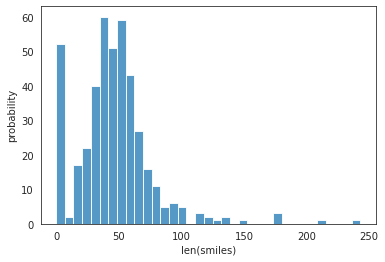

In [ ]:
# Goal: build a small molecule model -> filter only small molecules -> approximated by the length of each smiles string
smiles_data['len'] = [len(i) if i is not None else 0 for i in smiles_data['drug']]
smiles_lens = [len(i) if i is not None else 0 for i in smiles_data['drug']]
sns.histplot(smiles_lens)
plt.xlabel('len(smiles)')
plt.ylabel('probability')

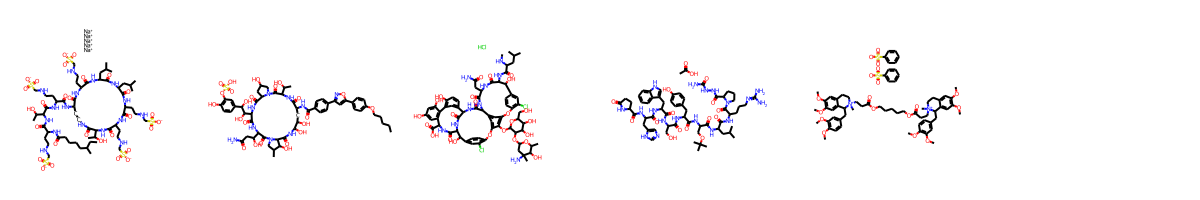

In [ ]:
# indices of large looking molecules
suspiciously_large = np.where(np.array(smiles_lens) > 150)[0]

# corresponding smiles string
long_smiles = smiles_data.loc[smiles_data.index[suspiciously_large]]['drug'].values

# look
Draw._MolsToGridImage([Chem.MolFromSmiles(i) for i in long_smiles], molsPerRow=6)

As suspected, these are not small molecules, so we'll remove them from the dataset. The argument here is that these molecules could register as inhibitors simply because they are large. They are more likely to sterically blocks the channel, rather than diffuse inside and bind

In [ ]:
# drop large molecules
smiles_data = smiles_data[~ smiles_data['drug'].isin(long_smiles)]

In [ ]:
nan_rows = smiles_data[smiles_data.isnull().T.any().T]
nan_rows[['n1', 'n2']]

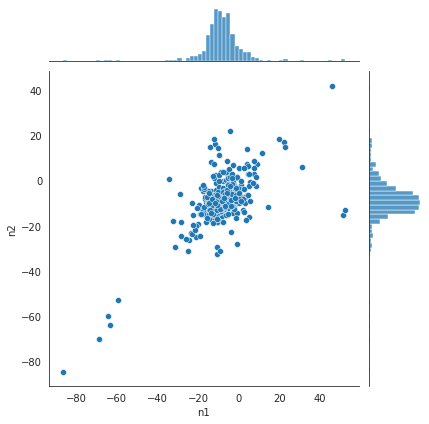

In [ ]:
df = smiles_data.dropna(axis=0, how='any')
# seaborn jointplot will allow us to compare n1 and n2, and plot each marginal
sns.jointplot(x='n1', y='n2', data=smiles_data)

We see that most of the data is contained in the gaussian-ish blob centered a bit below zero. We see that there are a few clearly active datapoints located in the bottom left, and one on the top right. These are all distinguished from the majority of the data. How do we handle the data in the blob?
Because n1 and n2 represent the same measurement, ideally they would be of the same value. This plot should be tightly aligned to the diagonal, and the pearson correlation coefficient should be 1. We see this is not the case. This helps gives us an idea of the error of our assay.
Let's look at the error more closely, plotting in the distribution of (n1-n2).

Text(0, 0.5, 'probability')

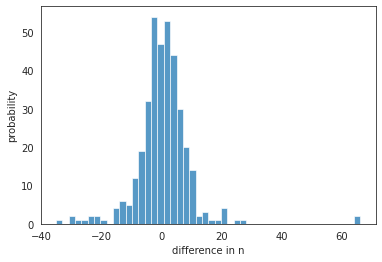

In [ ]:
diff_df = df['n1'] - df['n2']
sns.histplot(diff_df)
plt.xlabel('difference in n')
plt.ylabel('probability')

In [ ]:
from scipy import stats
mean, std = stats.norm.fit(np.asarray(diff_df, dtype=np.float32))
ci_95 = std*2
ci_95

18.044538497924805

We can't trust the data outside of the CI and will therefore drop these datapoints from df

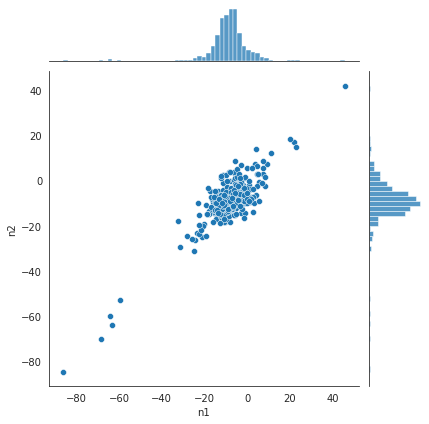

In [ ]:
noisy = diff_df[abs(diff_df) > ci_95]
df = df.drop(noisy.index)
sns.jointplot(x='n1', y='n2', data=df)

In [ ]:
# take the average
avg_df = df[['label', 'drug']].copy()
n_avg = df[['n1', 'n2']].mean(axis=1)
avg_df['n'] = n_avg
avg_df.sort_values('n', inplace=True)

Text(0, 0.5, 'activity')

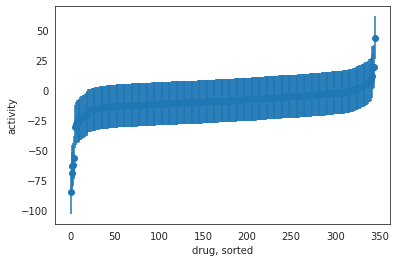

In [ ]:
# plot the sorted data w/ error bars
plt.errorbar(np.arange(avg_df.shape[0]), avg_df['n'], yerr=ci_95, fmt='o')
plt.xlabel('drug, sorted')
plt.ylabel('activity')

Now, let's identify our active compounds. In my case, this required domain knowledge. Having worked in this area, and having consulted with professors specializing on this channel, I am interested in compounds where the absolute value of the activity is greater than 25. This relates to the desired drug potency we would like to model.

If you are not certain how to draw the line between active and inactive, this cutoff could potentially be treated as a hyperparameter.

<ErrorbarContainer object of 3 artists>

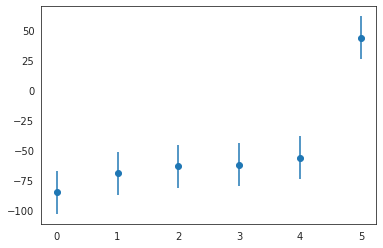

In [ ]:
actives = avg_df[abs(avg_df['n']) - ci_95 > 25]['n']
plt.errorbar(np.arange(actives.shape[0]), actives, yerr=ci_95, fmt='o')

In [ ]:
print(raw_data.shape, avg_df.shape, len(actives.index))

(430, 5) (346, 3) 6


In summary, we have:
1. Removed data that didn't address the question we hope to answer (small molecules only)
2. dropped NaNs
3. Determined the noise of our measurements
4. Removed exceptionally noisy datapoints
5. Identified actives (using domain knowledge to determine a threshold)

### Determine model type, final form of dataset, and sanity load
Now, what model framework should we use?

Given that we have 392 datapoints and 6 actives, this data will be used to build a low data one-shot classifier (10.1021/acscentsci.6b00367). If there were datasets of similar character, transfer learning could potentially be used, but this is not the case at the moment.

Let's apply logic to our dataframe in order to cast it into a binary format, suitable for classification.

In [ ]:
# 1 if condition for active is met, 0 otherwise
avg_df.loc[:, 'active'] = (abs(avg_df['n']) - ci_95 > 25).astype(int)

In [ ]:
avg_df.to_csv('modulators.csv', index=False)

In [ ]:
# convert to a DeepChem dataset
dataset_file = 'modulators.csv'
task = ['active']
featurizer_func = dc.feat.ConvMolFeaturizer()

loader = dc.data.CSVLoader(tasks=task, feature_field='drug', featurizer=featurizer_func)
dataset = loader.create_dataset(dataset_file)

Lastly, it is often advantageous to numerically transform the data in some way. For example, sometimes it is useful to normalize the data, or to zero the mean. This depends in the task at hand.

Built into DeepChem are many useful transformers, located in the deepchem.transformers.transformers base class.

Because this is a classification model, and the number of actives is low, I will apply a balancing transformer. I treated this transformer as a hyperparameter when I began training models. It proved to unambiguously improve model performance.

In [ ]:
transformer = dc.trans.BalancingTransformer(dataset=dataset)
dataset = transformer.transform(dataset)

In [ ]:
dc.utils.save_to_disk(dataset, 'balanced_dataset.joblib')
balanced_dataset = dc.utils.load_from_disk('balanced_dataset.joblib')

# 10. Putting Multitask Learning to Work

- Creation of multitask models on [MUV](https://pubs.acs.org/doi/10.1021/ci8002649). Goal: demonstrate how multitask methods can provide improved performance in situations w/ little or very unbalanced data
- The MUV dataset is a challenging benchmark in molecular design that consists of 17 different 'targets' where there are only a few 'active' compounds/target. There are 93,087 compounds in total, yet no task has more than 30 active compounds, and many have even less. Training a model with such a small number of positive examples is very challenging. Multitask models address this by training a single model that predicts all the different targets at once. If a feature is useful for predicting one task, it often is useful for predicting several other tasks as well. Each added task makes it easier to learn important features, which improves performance on [other tasks.](https://pubs.acs.org/doi/abs/10.1021/acs.jcim.7b00146)



In [ ]:
tasks, datasets, transformers = dc.molnet.load_muv(split='stratified')
train, alid, test = datasets

'split' is deprecated.  Use 'splitter' instead.


In [ ]:
tasks

['MUV-466',
 'MUV-548',
 'MUV-600',
 'MUV-644',
 'MUV-652',
 'MUV-689',
 'MUV-692',
 'MUV-712',
 'MUV-713',
 'MUV-733',
 'MUV-737',
 'MUV-810',
 'MUV-832',
 'MUV-846',
 'MUV-852',
 'MUV-858',
 'MUV-859']

In [ ]:
n_tasks = len(tasks)
n_features = train.get_data_shape()[0]
model = dc.models.MultitaskClassifier(n_tasks, n_features)
model.fit(train)

0.07018286228179932

In [ ]:
y_true = test.y
y_pred = model.predict(test)
metric = dc.metrics.roc_auc_score
for i in range(n_tasks):
    score = metric(dc.metrics.to_one_hot(y_true[:,i]), y_pred[:,i])
    print(tasks[i], score)

MUV-466 0.4927010567795092
MUV-548 0.9857155651083647
MUV-600 0.754289808346767
MUV-644 0.9382052659860289
MUV-652 0.706895934085617
MUV-689 0.7208669174279061
MUV-692 0.8381873544689235
MUV-712 0.8235626007522837
MUV-713 0.4866648755149561
MUV-733 0.7186727565824824
MUV-737 0.518869783270643
MUV-810 0.9038688876947878
MUV-832 0.8318466774135769
MUV-846 0.9952534479670428
MUV-852 0.8478774852229984
MUV-858 0.8613827691205445
MUV-859 0.5393831936385127
